In [57]:
import pandas as pd
import numpy as np
import re 
from matplotlib import pyplot as plt

In [138]:
job_df = pd.read_csv('./clean_data/clean_data.csv')

In [137]:
job_df.head()

,company,city,state,year_founded,size,rating_c,job_title,days_posted_c,start_salary,max_salary,industry,sector
0,1010data,New York,NY,2000,201 to 500 employees,3.0,Software Data Engineer,12.0,105000,108000,Computer Hardware & Software,Information Technology
1,1010data,New York,NY,2000,201 to 500 employees,3.0,"Sr. Software Development Engineer, Linux",15.0,73000,147000,Computer Hardware & Software,Information Technology
2,1904labs,Saint Louis,MO,2016,51 to 200 employees,5.0,Data Scientist,19.0,90000,109000,IT Services,Information Technology
3,2U,New York,NY,NaN,NaN,4.0,"Manager, AB Testing and Data Operations",9.0,0,0,NaN,NaN
4,2nd.MD,Houston,TX,2011,51 to 200 employees,5.0,Director of Quality Programs & Clinical Analytics,13.0,126000,158000,Health Care Services & Hospitals,Health Care


In [20]:
#help(job_df.sort_values)

In [140]:
job_df.state = job_df.state.str.strip()

In [141]:
job_df.start_salary = job_df.start_salary.map(lambda x: int( x * 1000))

In [142]:
job_df.max_salary = job_df.max_salary.map(lambda x: int( x * 1000))

In [199]:
job_df['sector'].sort_values()

71                   Accounting & Legal
515                 Aerospace & Defense
528                 Aerospace & Defense
529                 Aerospace & Defense
319                 Aerospace & Defense
142                 Aerospace & Defense
20                  Aerospace & Defense
19                  Aerospace & Defense
433                 Aerospace & Defense
488    Arts, Entertainment & Recreation
487    Arts, Entertainment & Recreation
268           Biotech & Pharmaceuticals
542           Biotech & Pharmaceuticals
593           Biotech & Pharmaceuticals
70            Biotech & Pharmaceuticals
592           Biotech & Pharmaceuticals
589           Biotech & Pharmaceuticals
228           Biotech & Pharmaceuticals
524           Biotech & Pharmaceuticals
522           Biotech & Pharmaceuticals
46            Biotech & Pharmaceuticals
462           Biotech & Pharmaceuticals
625           Biotech & Pharmaceuticals
212           Biotech & Pharmaceuticals
211           Biotech & Pharmaceuticals


In [198]:
#Set sector with undetermined sector ('500𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑡𝑜 1 billion (USD)', 100𝑡𝑜 500 million (USD)) to Unknown
#job_df.sector[job_df.iloc[194, 257,541,171] #= 'Unkown'
job_df.loc[[194, 257,541,171],'sector']  = 'Unkown'

#194, 257,541,171

In [143]:
group_st = job_df.groupby('state')

In [144]:
top_20 = group_st['state'].agg(['count']).sort_values('count',ascending=False).head(20)

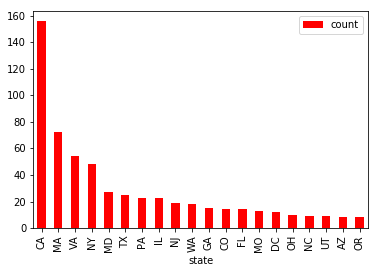

In [145]:
top_20.plot.bar(color='r');

C:\Users\patri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


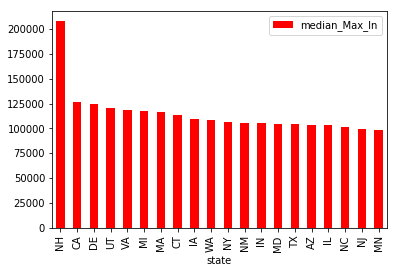

In [146]:
job_df.groupby('state')['max_salary'].agg({'median_Max_In':'median'}\
                                         ).sort_values('median_Max_In',ascending=False).head(20).plot.bar(color='r');
#.sort_values('median',ascending=False).head(20).plot.bar()

In [147]:
salary_df = job_df[job_df.start_salary !=0.0]
salary_gp = salary_df.groupby('state')
#group_st['max_salary'].agg(['min','max']).sort_values('max',ascending=False)

In [148]:
salary_gp['max_salary'].agg(['min','max']).sort_values('max',ascending=False).head()

,min,max
state,,
MA,65000,370000
CA,41000,250000
TX,43000,215000
NH,208000,208000
UT,100000,205000


In [149]:
salary_gp['start_salary'].agg(['min','max']).sort_values('max',ascending=False).head()

,min,max
state,,
MA,48000,244000
CA,23000,200000
NJ,39000,166000
NY,15000,161000
IL,27000,158000


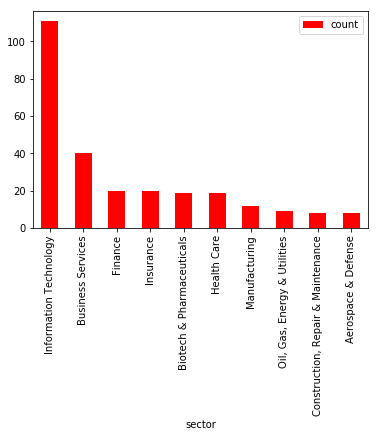

In [214]:
job_df.groupby('sector')['sector'].agg(['count']).sort_values('count',ascending=False).head(10).plot.bar(color='r');

In [221]:
job_df.groupby(['state','sector'])['sector'].agg(['count']).sort_values('count',ascending=False)
#.head(10).plot.bar(color='r');

count
state sector                                   
CA    Information Technology                 61
MA    Information Technology                 14
NY    Information Technology                  9
CA    Construction, Repair & Maintenance      8
      Health Care                             8
MA    Biotech & Pharmaceuticals               8
CA    Finance                                 7
NY    Business Services                       6
MA    Insurance                               6
WA    Oil, Gas, Energy & Utilities            6
CA    Biotech & Pharmaceuticals               5
NJ    Business Services                       5
GA    Information Technology                  4
VA    Business Services                       4
      Information Technology                  4
IL    Information Technology                  4
CA    Retail                                  4
      Media                                   4
TX    Information Technology                  4
MO    Business Services                       3
IL    Business Services                       3
CO    Information Technology                  3
CT    Insurance                               3
TX    Business Services                       3
MA    Aerospace & Defense                     3
NY    Insurance                               3
IN    Business Services                       2
MI    Finance                                 2
PA    Biotech & Pharmaceuticals               2
SC    Finance                                 2
...                                         ...
FL    Telecommunications                      1
      Finance                                 1
DC    Telecommunications                      1
      Biotech & Pharmaceuticals               1
CO    Insurance                               1
      Finance                                 1
      Aerospace & Defense                     1
CA    Oil, Gas, Energy & Utilities            1
      Insurance                               1
      Government                              1
      Education                               1
IL    Biotech & Pharmaceuticals               1
      Manufacturing                           1
LA    Health Care                             1
MN    Manufacturing                           1
NJ    Information Technology                  1
      Biotech & Pharmaceuticals               1
NC    Manufacturing                           1
      Information Technology                  1
MO    Oil, Gas, Energy & Utilities            1
      Information Technology                  1
MI    Real Estate                             1
MA    Business Services                       1
MI    Insurance                               1
      Education                               1
MA    Travel & Tourism                        1
      Oil, Gas, Energy & Utilities            1
      Health Care                             1
      Government                              1
WI    Insurance                               1

[109 rows x 1 columns]